In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('regressionOutliers.csv')
data.head()

,X,Y
0,0.655210,-5.1815
1,0.752910,-4.6796
2,0.810860,-3.6935
3,0.048427,-1.2416
4,0.414710,-2.1358


In [3]:
X=data['X']
Y=data['Y']

In [4]:
X=np.array(X)
Y=np.array(Y)

Text(0, 0.5, 'Y')

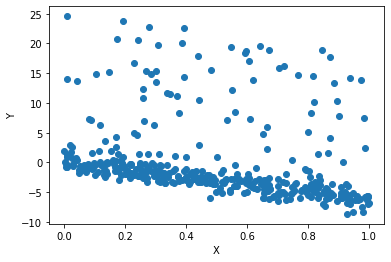

In [5]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

In [6]:

#Banana_width=4
#Banana_length=8
#Apple_width=6
#Apple_length=6


N=50
std=0.5

bananas_width=np.random.normal(4,std,N)
bananas_length=np.random.normal(8,std,N)

apples_width=np.random.normal(6,std,N)
apples_length=np.random.normal(6,std,N)

width=np.concatenate((bananas_width,apples_width))
length=np.concatenate((bananas_length,apples_length))
#print(width.shape)
#print(length.shape)

X=np.array([width,length]).T
#print(X.shape)
#X after transpose: X=[200 rows of width,200 rows of length]
#first 100 rows are bananas
#second 100 rows are apples
#banana label is zero
#apple label is one


bananas_label=np.zeros(N, dtype='int')
apples_label=np.ones(N, dtype='int')

Y=np.concatenate((bananas_label,apples_label))

Text(0, 0.5, 'Length')

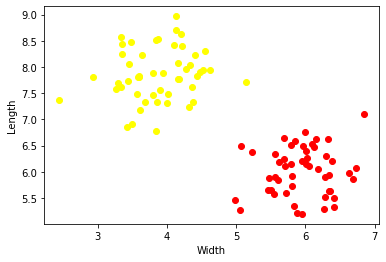

In [7]:
#bananas
plt.scatter(X[0:N,0],X[0:N,1],c='yellow')

#apples
plt.scatter(X[N:,0],X[N:,1],c='red')


plt.xlabel('Width')
plt.ylabel('Length')


In [25]:
N_test=50
banana_width_test=np.random.normal(4,0.5,N_test)
banana_length_test=np.random.normal(8,0.5,N_test)
apple_width_test=np.random.normal(6,0.5,N_test)
apple_length_test=np.random.normal(6,0.5,N_test)

width_test=np.concatenate((banana_width_test,apple_width_test))
length_test=np.concatenate((banana_length_test,apple_length_test))
x_test=np.array([width_test,length_test]).T
#print(type(x_test))
#print(x_test.shape)
print(x_test)
banana_label_test=np.zeros(N_test, dtype='int')
apple_label_test=np.ones(N_test,dtype='int')

y_test=np.concatenate((banana_label_test,apple_label_test))

[[4.46637517 7.52236988]
 [3.89804181 7.53850098]
 [4.12639198 6.47674533]
 [4.14480926 7.8797197 ]
 [5.16723794 8.47110477]
 [4.80057186 8.52545126]
 [4.25881318 7.74780988]
 [3.64537079 8.39914825]
 [4.67538033 9.04607421]
 [4.1629538  7.6074295 ]
 [4.02659434 8.03829735]
 [3.72167564 9.07566766]
 [4.96213589 7.48436393]
 [4.32797644 8.34283866]
 [4.09669248 7.87618988]
 [3.3201214  8.34782775]
 [3.16505971 7.81246637]
 [3.18330684 8.88691311]
 [3.58851596 7.63911687]
 [4.23524623 8.28815031]
 [4.73667607 7.86932681]
 [4.19310427 8.76536346]
 [4.18979339 7.76543039]
 [4.38675855 8.36672083]
 [3.89773077 8.81691416]
 [3.44719627 7.82727666]
 [2.88489677 7.93986686]
 [4.49261549 7.98952961]
 [3.61219564 7.94002045]
 [3.09140014 8.34843866]
 [4.49276448 8.20961121]
 [3.70191867 8.24413239]
 [5.33891026 7.19588236]
 [4.03795912 7.7853996 ]
 [3.6210115  8.1533902 ]
 [4.39865725 8.13817719]
 [3.52058359 8.88436405]
 [4.67196721 8.56269109]
 [4.15771453 7.55741563]
 [3.7671616  8.50260267]


In [28]:
class KnearestNeighbors:
    def __init__(self,k):
        self.k=k
        
    #train    
    def fit(self,X_train,y_train):
        
        self.X_train=X_train
        self.y_train=y_train
        
        #to know the count of classes
        self.number_of_classes=len(np.unique(y_train))
        
    #test    
    
    def nearNeighbors(self,x_test):
        
        #for i in range(x_test):
        distance=np.sqrt(np.sum((x_test-self.X_train)**2,axis=1))
       
       
        #print("distance.shape=",distance.shape)
       
        #distance=np.sqrt(np.sum((x_test-self.X_train)**2,axis=1))
        near_neighbors=np.argsort(distance)[0:self.k]
        #print(distance)
        
        return near_neighbors
        
    def predict(self,x_test):
        near_neighbors=self.nearNeighbors(x_test)
        
        #print(near_neighbors)#print the index of the nearest friuts 
        #print(self.y_train[near_neighbors])#print the lables of the nearest fruits
        #print(np.bincount(self.y_train[near_neighbors]))
        #print(np.argmax(np.bincount(self.y_train[near_neighbors])))#print the index of nearest
        y=np.argmax(np.bincount(self.y_train[near_neighbors]))
        #0=banana
        #1=apple
        return y

In [29]:
knn=KnearestNeighbors(5)
knn.fit(X,Y)
#knn_test=KnearestNeighbors(5)
#new_fruit=np.array([6,6.5])
        
fruits={0:'banana',
       1:'appale'}

for i in range(len(x_test)):
   #for j in range(len(x_test[i])):
        #rint(x_test[i])
        #rint(x_test[i][j])
        #nn.predict(x_test[i][j])
        y_pred= knn.predict(x_test[i])
        #rint(y_pred)
        #rint('Predicted fruit is ',fruits[y_pred])
        print(x_test[i],',Predicted fruit is ' , fruits[y_pred])


       
    
    

    


[4.46637517 7.52236988] ,Predicted fruit is  banana
[3.89804181 7.53850098] ,Predicted fruit is  banana
[4.12639198 6.47674533] ,Predicted fruit is  banana
[4.14480926 7.8797197 ] ,Predicted fruit is  banana
[5.16723794 8.47110477] ,Predicted fruit is  banana
[4.80057186 8.52545126] ,Predicted fruit is  banana
[4.25881318 7.74780988] ,Predicted fruit is  banana
[3.64537079 8.39914825] ,Predicted fruit is  banana
[4.67538033 9.04607421] ,Predicted fruit is  banana
[4.1629538 7.6074295] ,Predicted fruit is  banana
[4.02659434 8.03829735] ,Predicted fruit is  banana
[3.72167564 9.07566766] ,Predicted fruit is  banana
[4.96213589 7.48436393] ,Predicted fruit is  banana
[4.32797644 8.34283866] ,Predicted fruit is  banana
[4.09669248 7.87618988] ,Predicted fruit is  banana
[3.3201214  8.34782775] ,Predicted fruit is  banana
[3.16505971 7.81246637] ,Predicted fruit is  banana
[3.18330684 8.88691311] ,Predicted fruit is  banana
[3.58851596 7.63911687] ,Predicted fruit is  banana
[4.23524623 8.